# AI Census

AI Project, which predicts whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

## Data Set Information

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

## Attribute Information

| Attribute      | Description |
|----------------| --- |
| age            | Continuous numerical value representing the age of an individual |
| workclass      | Categorical value representing the type of employment of an individual, with options including Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, and Never-worked |
| fnlwgt         | Estimate of the number of people in the US that have the same demographic characteristics as the person in the row |
| education      | Categorical value representing the level of education of an individual, with options including Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, and Preschool |
| education-num  | Continuous numerical value representing the number of years of education completed by an individual |
| marital-status | Categorical value representing the marital status of an individual, with options including Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, and Married-AF-spouse |
| occupation     | Categorical value representing the type of occupation of an individual, with options including Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, and Armed-Forces |
| relationship   | Categorical value representing the relationship of an individual to others in the household, with options including Wife, Own-child, Husband, Not-in-family, Other-relative, and Unmarried |
| race           | Categorical value representing the race of an individual, with options including White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, and Black |
| sex            | Categorical value representing the gender of an individual, with options including Female and Male |
| capital-gain   | Continuous numerical value representing the capital gain of an individual |
| capital-loss   | Continuous numerical value representing the capital loss of an individual |
| hours-per-week | Continuous numerical value representing the number of hours worked per week by an individual |
| native-country | Categorical value representing the native country of an individual, with options including United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, and Holand-Netherlands |
| class          | Categorical value representing the income of an individual, with options including >50K and <=50K |

## Data Exploration

The data exploration phase involves analyzing the dataset to understand the distribution of the variables, identifying any missing or outliers, and determining which features are relevant for the prediction phase.

### Importing the libraries

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [171]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

df_census = pd.read_csv('input/adult.data', names=column_names, index_col=False)

df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning

We decided to remove the "fnlwgt" column because it is and estimate of the number of people in the US that have the same demographic characteristics as the person in the row. This column is not relevant for the prediction phase.

In [172]:
df_census.drop('fnlwgt', axis=1, inplace=True)

In [173]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


When analyzing the dataset, it is essential to have a look missing values, because these have to be treated before the training phase.

In [174]:
df_census.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

 In the case of our dataset, there are no missing values.


### Analyse the different values of each column

In [175]:
for column in df_census.columns:
    print('----------------------------------------')
    print(f"{column}: {df_census[column].unique()}")

----------------------------------------
age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
----------------------------------------
workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------------
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------------------------------------
education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
----------------------------------------
marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
-------------------------

From the above output we can see that some string columns have leading whitespaces which should be removed.

In [176]:
for column in df_census.columns:
    if df_census[column].dtype == 'object':
        df_census[column] = df_census[column].str.strip()

In [177]:
for column in df_census.columns:
    print('----------------------------------------')
    print(f"{column}: {df_census[column].unique()}")

----------------------------------------
age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
----------------------------------------
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------------------------------------
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
----------------------------------------
education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
----------------------------------------
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
----------------------------------------
occupation: ['Ad

In [178]:
df_census.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Analyse the distribution of the numerical columns

In [179]:
df_census['age'].value_counts().sort_index()

17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: age, Length: 73, dtype: int64

We can see that the peoples ages reaches from 17 to 90 years old.

In [180]:
df_census['education-num'].value_counts().sort_index()

1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5355
14     1723
15      576
16      413
Name: education-num, dtype: int64

We can see that the peoples education-num, which is the number of years of education completed by an individual, reaches from 1 to 16 years and the most common value is 9 and the other are approximately evenly distributed.

In [181]:
df_census['capital-gain'].value_counts().sort_index()

0        29849
114          6
401          2
594         34
914          8
         ...  
25236       11
27828       34
34095        5
41310        2
99999      159
Name: capital-gain, Length: 119, dtype: int64

In [182]:
df_census['capital-loss'].value_counts().sort_index()

0       31042
155         1
213         4
323         3
419         3
        ...  
3004        2
3683        2
3770        2
3900        2
4356        3
Name: capital-loss, Length: 92, dtype: int64

In [183]:
df_census['hours-per-week'].value_counts().sort_index()

1     20
2     32
3     39
4     54
5     60
      ..
95     2
96     5
97     2
98    11
99    85
Name: hours-per-week, Length: 94, dtype: int64

In [184]:
df_census['salary'].value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

We can see that the dataset is imbalanced, because the number of people with salary <=50K is much higher than the number of people with salary >50K.

## Data Visualization

Data visualization helps to understand the relationship between different variables and identify patterns in the data.
It allows to detect outliers and trends that might not be apparent from a simple statistical summary.

### Importing the libraries

In [185]:
import matplotlib.pyplot as plt

### Visualizing the data

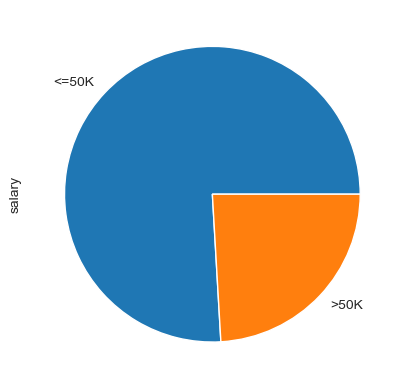

In [186]:
df_census['salary'].value_counts().plot(kind='pie');

## Data Preprocessing

Data preprocessing is the process of cleaning and formatting the data to make it suitable for training the model.
This might include filling in missing values, normalizing the data, and encoding categorical variables.

First we change the salary column to either 0 if they earn less than 50K a year or 1 for more than 50K a year.

In [168]:
df_census['salary'] = df_census['salary'].map(lambda salary: 0 if salary == '<=50K' else 1)

In [169]:
df_census

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


## Training

The training phase is where the model is trained to fit to the data provided by the dataset, using a set of parameters called hyperparameters.
The goal is to find the optimal set of hyperparameters that will produce the best model for the prediction task.
But you also have to be careful about an overfitting or underfitting model.

## Hyperparameter Tuning

Hyperparameter tuning is the process of fine-tuning the model's hyperparameters to improve its performance on the prediction task.

## Evaluation

The evaluation phase involves assessing the performance of the model on a set of unknown realistic data to the model.
This process is usually done by comparing the predicted values to the true values, and calculating metrics such as accuracy, precision, and recall.